In [1]:
#initialize environment

from google.colab import drive
drive.mount('/content/drive')

import io
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image
import pandas as pd

Mounted at /content/drive


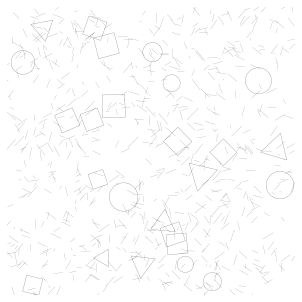

In [13]:


num_shapes=25
num_noise=700

im_size=160
max_radius=8
min_radius=4

noise_line=6

fig, ax = plt.subplots()
plt.gray()
plt.axis('scaled')
plt.axis('off')
plt.subplots_adjust(bottom=0.0, left=0.0, right=1.0, top=1.0)


plt.xlim([0, im_size])
plt.ylim([0, im_size])

lnw = 0.15
lnw_noise = 0.1

rng=np.random.default_rng(100)
shape=rng.integers(2,5,size=num_shapes)
shape[shape==2] = 0
params=rng.random((num_shapes,4))
params_rel = np.zeros((num_shapes,5))

noise_params=rng.random((num_noise,4))

scale=[1.3,1.25]

for i, s in enumerate(shape):
  r = min_radius+params[i,0]*(max_radius-min_radius)
  pos = params[i,1:3]*(im_size-2*r)+r
  if s == 0:
    params_rel[i] = (pos[0],pos[1],r,s,0)
    patch = matplotlib.patches.Circle(pos, radius=r, lw=lnw, fc='k', fill=False)
    ax.add_patch(patch)
  else:
    r = r * scale[s-3]
    a = params[i,3]*2*np.pi/s
    params_rel[i] = (pos[0],pos[1],r,s,a)
    patch = matplotlib.patches.RegularPolygon(pos,numVertices=s,radius=r,orientation=a,lw=lnw,fc='k',fill=False)
    ax.add_patch(patch)

for p in noise_params:
  x=p[0:2]*im_size
  y=x+(p[2:5]-0.5)*2*noise_line
  line = matplotlib.lines.Line2D([x[0],y[0]],[x[1],y[1]],lw=lnw_noise,c='k')
  ax.add_line(line)

plt.show()

fig.set(figwidth=1, figheight=1, dpi=im_size)
#fig.savefig('drive/MyDrive/task.png', transparent=False)
img_buf = io.BytesIO()
fig.savefig(img_buf, format='png', transparent=False)
img = Image.open(img_buf).convert('L')
arr = np.asarray(img)

params_rel[:,0:3] = params_rel[:,0:3]/im_size
params_rel[:,3] = shape

df = pd.DataFrame(params_rel, columns=['pos_x','pos_y','radius','shape','angle'])
df.to_csv('drive/MyDrive/task.csv', float_format='%.6f')

In [14]:
params_rel.dtype

dtype('float64')

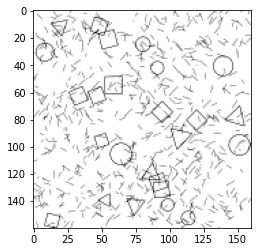

In [ ]:
plt.imshow(arr)

In [41]:

def generateShapes(num_shapes=25,max_radius=1/20,min_radius=1/40,rng=np.random.default_rng(100)):
  params = np.zeros((num_shapes,5))
  params[:,0] = rng.integers(2,5,size=num_shapes)
  params[:,1:5] = rng.random((num_shapes,4))
  for p in params:
    p[3] = min_radius+p[3]*(max_radius-min_radius)
    p[1:3] = p[1:3]*((1-2*p[3])+p[3])
    if p[0] == 2:
      p[4] = 0
    else:
      p[4] = p[4]*2*np.pi/p[0]
  return params

gen_shapes = generateShapes()
gen_shapes

array([[4.        , 0.5587356 , 0.57688692, 0.0383812 , 1.56416302],
       [4.        , 0.48319637, 0.74222176, 0.03735404, 1.56714343],
       [2.        , 0.9462803 , 0.38056136, 0.03304813, 0.        ],
       [3.        , 0.77117831, 0.66708332, 0.03521295, 0.81632218],
       [2.        , 0.12808599, 0.6085715 , 0.02706003, 0.        ],
       [2.        , 0.62602533, 0.01400294, 0.0458633 , 0.        ],
       [3.        , 0.50804018, 0.5297817 , 0.03068117, 2.00219609],
       [2.        , 0.32504609, 0.48114538, 0.04668459, 0.        ],
       [3.        , 0.36591135, 0.09156515, 0.04889514, 1.23478652],
       [4.        , 0.5654421 , 0.57999416, 0.02872185, 0.87972233],
       [4.        , 0.5464844 , 0.56377715, 0.02962372, 1.11466678],
       [3.        , 0.06808309, 0.31587548, 0.02767139, 1.56666763],
       [3.        , 0.48811059, 0.45379131, 0.02684233, 0.9259245 ],
       [4.        , 0.21571977, 0.29241439, 0.0348587 , 1.10997283],
       [4.        , 0.75352993, 0.

[[4.00000000e+00 1.43036314e+04 1.47683051e+04 9.82558787e+02
  1.56416302e+00]
 [4.00000000e+00 1.23698270e+04 1.90008772e+04 9.56263538e+02
  1.56714343e+00]
 [2.00000000e+00 2.42247756e+04 9.74237072e+03 8.46032168e+02
  0.00000000e+00]
 [3.00000000e+00 1.97421648e+04 1.70773331e+04 9.01451425e+02
  8.16322185e-01]
 [2.00000000e+00 3.27900123e+03 1.55794305e+04 6.92736877e+02
  0.00000000e+00]
 [2.00000000e+00 1.60262485e+04 3.58475239e+02 1.17410059e+03
  0.00000000e+00]
 [3.00000000e+00 1.30058286e+04 1.35624116e+04 7.85438056e+02
  2.00219609e+00]
 [2.00000000e+00 8.32117998e+03 1.23173217e+04 1.19512551e+03
  0.00000000e+00]
 [3.00000000e+00 9.36733060e+03 2.34406797e+03 1.25171560e+03
  1.23478652e+00]
 [4.00000000e+00 1.44753177e+04 1.48478504e+04 7.35279317e+02
  8.79722329e-01]
 [4.00000000e+00 1.39900007e+04 1.44326951e+04 7.58367357e+02
  1.11466678e+00]
 [3.00000000e+00 1.74292703e+03 8.08641218e+03 7.08387501e+02
  1.56666763e+00]
 [3.00000000e+00 1.24956311e+04 1.161705

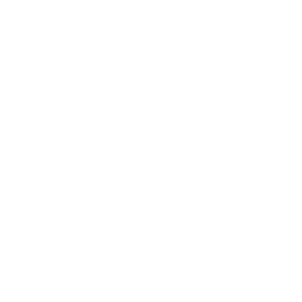

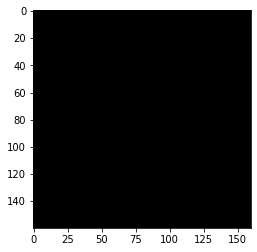

In [43]:
def generateImage(shapes, im_size=160,lnw = 0.5):
  fig, ax = plt.subplots()
  plt.axis('scaled')
  plt.axis('off')
  plt.subplots_adjust(bottom=0.0, left=0.0, right=1.0, top=1.0)
  plt.xlim([0, im_size])
  plt.ylim([0, im_size])
  shapes[:,1:4] = shapes[:,1:4]*im_size
  print(shapes)
  for s in shapes:
    if s[0] == 2:
      patch = matplotlib.patches.Circle(s[1:3], radius=s[4], lw=lnw, fc='b', fill=False)
      ax.add_patch(patch)
    else:
      patch = matplotlib.patches.RegularPolygon(s[1:3],numVertices=int(s[0]),radius=s[3],orientation=s[4],lw=lnw,fc='b',fill=False)
      ax.add_patch(patch)

  plt.show()

  fig.set(figwidth=1, figheight=1, dpi=im_size)
  img_buf = io.BytesIO()
  fig.savefig(img_buf, format='png', transparent=False)
  img = Image.open(img_buf).convert('L')
  return np.asarray(img)

image = generateImage(gen_shapes)
plt.imshow(image)


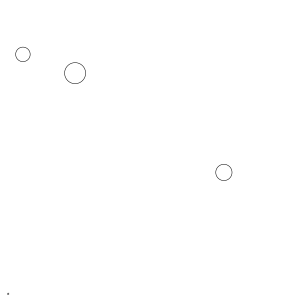

array([[3.00000000e+00, 9.52322367e-01, 9.42960096e-01, 3.84788366e-02,
        1.92198490e+00],
       [4.80000000e+02, 1.20383371e+02, 6.79817011e+01, 4.51044869e+00,
        1.27881806e+02],
       [6.40000000e+02, 8.73416891e+00, 1.33568852e+02, 4.02604264e+00,
        1.97603337e+02],
       [3.20000000e+02, 3.77267449e+01, 1.23134520e+02, 5.82997996e+00,
        0.00000000e+00],
       [4.00000000e+00, 7.91875951e-01, 3.80864018e-01, 2.88724747e-02,
        2.93773365e-01],
       [4.00000000e+00, 2.21987595e-01, 4.73057698e-02, 3.67748040e-02,
        1.19846538e+00],
       [3.00000000e+00, 3.52752317e-01, 5.64015525e-01, 3.18598499e-02,
        1.40499808e+00],
       [4.00000000e+00, 4.93520095e-01, 5.11838645e-01, 2.55018375e-02,
        8.82496873e-01],
       [3.00000000e+00, 4.34022339e-01, 5.65404908e-01, 3.93308167e-02,
        1.41543091e+00],
       [2.00000000e+00, 4.84893771e-01, 8.04735153e-01, 3.48835801e-02,
        0.00000000e+00],
       [3.00000000e+00, 6.6034

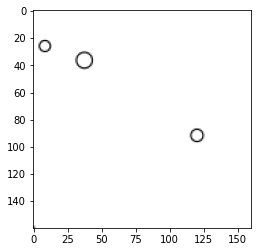

In [32]:
shapes = generateShapes()
image = generateImage(shapes=shapes)
plt.imshow(image)
shapes

In [11]:
#functions

def generateShapes_old(num_shapes=25,im_size=160,max_radius=8,min_radius=4,rng=np.random.default_rng(100)):
  shape=rng.integers(2,5,size=num_shapes)
  shape[shape==2] = 0
  params=rng.random((num_shapes,4))
  params_rel = np.zeros((num_shapes,5))
  scale=[1.3,1.25]
  for i, s in enumerate(shape):
    r = min_radius+params[i,0]*(max_radius-min_radius)
    pos = params[i,1:3]*(im_size-2*r)+r
    if s == 0:
      params_rel[i] = (pos[0],pos[1],r,s,0)
    else:
      r = r * scale[s-3]
      a = params[i,3]*2*np.pi/s
      params_rel[i] = (pos[0],pos[1],r,s,a)
  return params_rel

generateShapes_old()

array([[ 94.72224411,  85.19386853,   7.90518239,   4.        ,
          1.56416302],
       [120.10712184,  79.13603413,   7.50973042,   4.        ,
          1.56714343],
       [ 64.65559599,  54.32678268,   7.91448769,   0.        ,
          0.        ],
       [107.87333401,  66.67970512,   9.35648946,   3.        ,
          0.81632218],
       [ 98.9434458 ,  16.96481782,   4.52659358,   0.        ,
          0.        ],
       [  8.77819116, 129.09295211,   6.62446811,   0.        ,
          0.        ],
       [ 86.8804936 ,  39.68518269,   7.92542828,   3.        ,
          2.00219609],
       [ 80.70269045, 134.84019271,   5.3638554 ,   0.        ,
          0.        ],
       [ 19.87599041, 147.87958571,   7.20055652,   3.        ,
          1.23478652],
       [ 94.31364637,  28.26413839,   7.91081446,   4.        ,
          0.87972233],
       [ 91.94532479,  33.5316592 ,   7.8158376 ,   4.        ,
          1.11466678],
       [ 53.47757535,  20.46225733,   5.564

In [ ]:
#use function

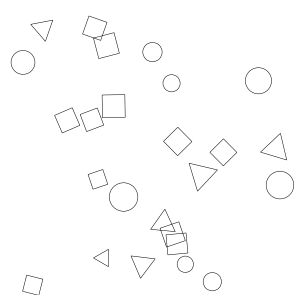

In [ ]:
fig, ax = plt.subplots()
plt.axis('scaled')
plt.axis('off')
plt.subplots_adjust(bottom=0.0, left=0.0, right=1.0, top=1.0)

plt.xlim([0, im_size])
plt.ylim([0, im_size])

lnw = 0.5

shape = params_rel

for s in shape:
  v, a = s[3:5]
  s = s*im_size
  if v == 0:
    patch = matplotlib.patches.Circle(s[0:2], radius=s[2], lw=lnw, fc='b', fill=False)
    ax.add_patch(patch)
  else:
    patch = matplotlib.patches.RegularPolygon(s[0:2],numVertices=v,radius=s[2],orientation=a,lw=lnw,fc='b',fill=False)
    ax.add_patch(patch)

plt.show()

In [ ]:
img = Image.open('drive/MyDrive/to.png').convert('L')
img = np.asarray(img)

tile_size = 32

tiles = [img[x:x+tile_size,y:y+tile_size] for x in range(0,im_size,tile_size) for y in range(0,im_size,tile_size)]

matplotlib.image.imsave('drive/MyDrive/10.png', tiles[10],dpi=tile_size)


In [ ]:
df

,pos_x,pos_y,radius,shape,angle
0,0.592014,0.532462,0.049407,4.0,1.564163
1,0.750670,0.494600,0.046936,4.0,1.567143
2,0.404097,0.339542,0.049466,0.0,0.000000
3,0.674208,0.416748,0.058478,3.0,0.816322
4,0.618397,0.106030,0.028291,0.0,0.000000
5,0.054864,0.806831,0.041403,0.0,0.000000
6,0.543003,0.248032,0.049534,3.0,2.002196
7,0.504392,0.842751,0.033524,0.0,0.000000
8,0.124225,0.924247,0.045003,3.0,1.234787
9,0.589460,0.176651,0.049443,4.0,0.879722
